In [1]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

import cv2
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
import scipy.sparse as sparse
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.utils import resample
from sklearn.manifold import MDS, Isomap, LocallyLinearEmbedding, TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from matplotlib import offsetbox
import joblib
import pickle
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
with open('X_test.pkl', 'rb') as file:
    X_test = pickle.load(file)
with open('t_test.pkl', 'rb') as file:
    t_test = pickle.load(file)

**1. Implement Recursive Feature Elimination (RFE) to select the subset of features. Experiment with at least 2 different estimators.**

RFE with Logistic Regression

In [3]:
rfe_lr = joblib.load('rfe_lr.pkl')
y_test=rfe_lr.predict(X_test)
print('\n\nTraining Set Performance')
print('Accuracy Score:', 100*rfe_lr.score(X_test, t_test),'%')
print('Confusion Matrix:')
print(confusion_matrix(t_test,y_test))
print('Performance Report: ')
print(classification_report(t_test,y_test))



Training Set Performance
Accuracy Score: 39.270833333333336 %
Confusion Matrix:
[[121  14  29  27  17   5  19  24   8  11]
 [ 13  97  17  24  13  14  17  43  17  15]
 [ 16  16 147  19  29  11  23  16   3   7]
 [ 39  18  30 127  10  18  27  11   7   8]
 [ 19  22  60  14 102  21  20  18  16  17]
 [  9  14  31  20  22 107  29  19  31  15]
 [ 21  17  22  24  10  23 113   9  25  27]
 [ 25  29  35  12  17  11   7 123  10   9]
 [ 24  22  13  17   9  33  29  17 102  26]
 [ 15  13  19  14  28  32  25  22  26  92]]
Performance Report: 
              precision    recall  f1-score   support

         0.0       0.40      0.44      0.42       275
         1.0       0.37      0.36      0.36       270
         2.0       0.36      0.51      0.43       287
         3.0       0.43      0.43      0.43       295
         4.0       0.40      0.33      0.36       309
         5.0       0.39      0.36      0.37       297
         6.0       0.37      0.39      0.38       291
         7.0       0.41      0.44

Identify which pixels are selected and display mask examples from the training dataset.

Selected Feature Indices: [5, 49, 81, 88, 94, 95, 96, 97, 98, 99, 103, 129, 131, 149, 159, 160, 161, 162, 163, 164, 169, 171, 177, 178, 179, 180, 181, 182, 183, 196, 199, 209, 210, 211, 212, 214, 221, 223, 227, 228, 229, 230, 231, 257, 259, 260, 261, 262, 263, 264, 266, 273, 274, 275, 277, 278, 279, 280, 281, 297, 309, 310, 311, 312, 313, 314, 321, 322, 323, 324, 326, 327, 330, 332, 333, 336, 347, 348, 357, 359, 360, 361, 362, 363, 364, 370, 371, 372, 373, 374, 375, 376, 381, 382, 383, 384, 385, 386, 396, 397, 398, 399, 409, 410, 411, 412, 413, 414, 417, 418, 419, 420, 421, 422, 423, 428, 429, 430, 431, 433, 447, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 471, 472, 477, 478, 479, 480, 481, 482, 483, 485, 486, 489, 496, 497, 498, 499, 511, 512, 513, 514, 515, 516, 517, 518, 519, 521, 522, 524, 526, 527, 528, 529, 530, 531, 535, 536, 537, 538, 539, 557, 558, 559, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572, 574, 576, 577, 578, 579, 580, 581, 582, 584, 585,

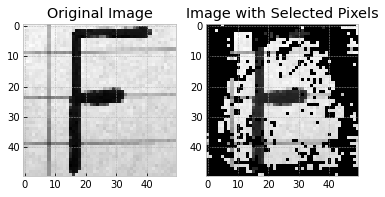

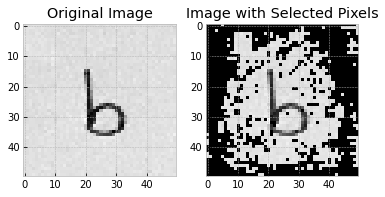

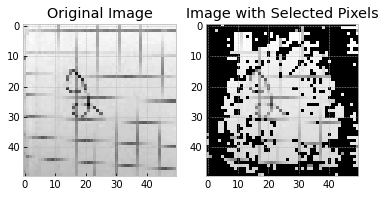

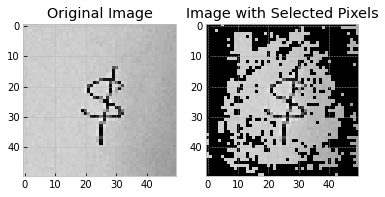

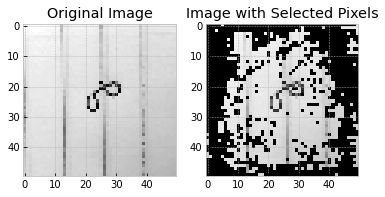

In [6]:
selected_pixels = rfe_lr.support_
selected_features_ranking = rfe_lr.ranking_ # Get the ranking of the selected features

selected_indices = [i for i, selected in enumerate(selected_pixels) if selected] # get selected indice
print("Selected Feature Indices:", selected_indices)

# Create a binary mask where 1 represents selected features and 0 represents unselected features
selected_mask = selected_features_ranking == 1

# Reshape the mask to match the dimensions of input data
selected_mask = selected_mask.reshape(X_test.shape[1:])

# Display mask examples from the training dataset
num_examples = 5
for i in range(num_examples):
    example = X_test[i] 
    example_with_mask = example * selected_mask  # Apply the mask to the example
    plt.figure()
    plt.subplot(1, 2, 1)
    plt.imshow(example.reshape(50, 50), cmap='gray')
    plt.title('Original Image')
    plt.subplot(1, 2, 2)
    plt.imshow(example_with_mask.reshape(50, 50), cmap='gray')  # Display the masked image
    plt.title('Image with Selected Pixels')
    plt.show()

RFE with Random Forest

In [52]:
rfe_rf = joblib.load('rfe_rf.pkl')
y_test=rfe_rf.predict(X_test)
print('\n\nTraining Set Performance')
print('Accuracy Score:', 100*rfe_rf.score(X_test, t_test),'%')
print('Confusion Matrix:')
print(confusion_matrix(t_test,y_test))
print('Performance Report: ')
print(classification_report(t_test,y_test))



Training Set Performance
Accuracy Score: 42.25694444444444 %
Confusion Matrix:
[[131  15  29  23   9  11  22  11  10  14]
 [ 22 102  29   9  15  17   8  39  22   7]
 [ 12  16 193  10  17  11   8  11   3   6]
 [ 43  15  34  97  11  19  26  17  15  18]
 [ 26  26  55   7 126  21  22  13   8   5]
 [ 17  29  48  19  19 100  12  11  35   7]
 [ 23  21  24  24  11  12 119  18  15  24]
 [ 18  49  48   4  18  13   9 101   9   9]
 [ 12  21  17  18   7  27  22  21 125  22]
 [ 24  16  22  11  14  14  21  16  25 123]]
Performance Report: 
              precision    recall  f1-score   support

         0.0       0.40      0.48      0.43       275
         1.0       0.33      0.38      0.35       270
         2.0       0.39      0.67      0.49       287
         3.0       0.44      0.33      0.38       295
         4.0       0.51      0.41      0.45       309
         5.0       0.41      0.34      0.37       297
         6.0       0.44      0.41      0.42       291
         7.0       0.39      0.36 

In [ ]:
Display mask examples from the training dataset

Selected Feature Indices: [0, 1, 2, 3, 6, 7, 8, 9, 13, 19, 25, 34, 37, 38, 41, 45, 46, 47, 48, 49, 50, 53, 57, 58, 90, 92, 95, 96, 97, 98, 99, 100, 101, 102, 104, 110, 129, 140, 142, 145, 146, 150, 151, 152, 178, 179, 181, 192, 196, 197, 198, 221, 226, 227, 228, 229, 230, 231, 248, 250, 251, 257, 261, 262, 270, 272, 273, 274, 275, 276, 277, 278, 279, 280, 282, 284, 293, 298, 299, 300, 302, 312, 315, 318, 319, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 333, 335, 346, 348, 349, 350, 351, 362, 366, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 383, 384, 397, 398, 400, 411, 412, 414, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 449, 450, 451, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 486, 499, 500, 513, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 536, 538, 540, 549, 552, 563, 564, 56

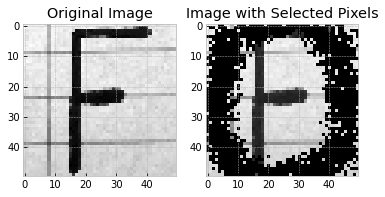

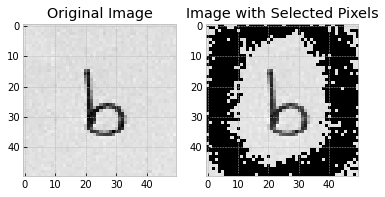

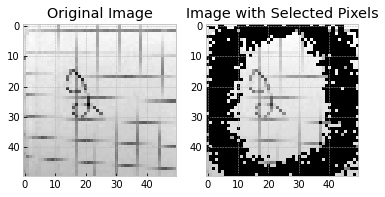

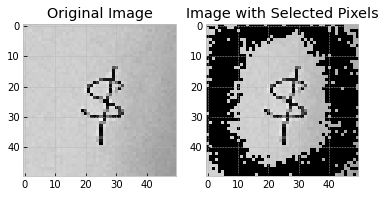

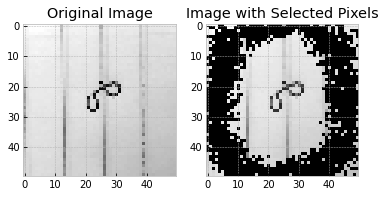

In [55]:
# Get the ranking of the selected features
selected_pixels = rfe_rf.support_
selected_features_ranking = rfe_rf.ranking_

selected_indices = [i for i, selected in enumerate(selected_pixels) if selected]
print("Selected Feature Indices:", selected_indices)

# Create a binary mask where 1 represents selected features and 0 represents unselected features
selected_mask = selected_features_ranking == 1

# Reshape the mask to match the dimensions of input data
selected_mask = selected_mask.reshape(X_test.shape[1:])

# Display mask examples from the training dataset
num_examples = 5
for i in range(num_examples):
    example = X_test[i]
    example_with_mask = example * selected_mask  # Apply the mask to the example
    plt.figure()
    plt.subplot(1, 2, 1)
    plt.imshow(example.reshape(50, 50), cmap='gray')
    plt.title('Original Image')
    plt.subplot(1, 2, 2)
    plt.imshow(example_with_mask.reshape(50, 50), cmap='gray')  # Display the masked image
    plt.title('Image with Selected Pixels')
    plt.show()

**2. Implement Principal Component Analysis (PCA) to select the number of components that explain at least 90% of the explained variance.**

Number of components for 90% explained variance: 161


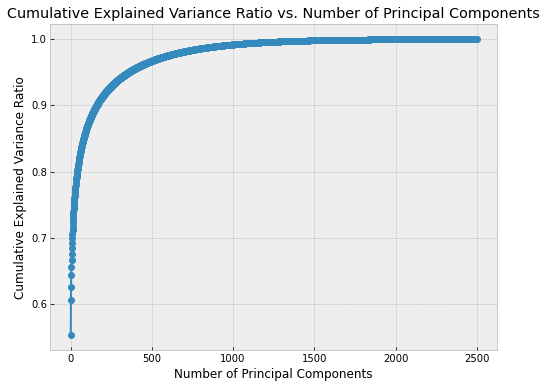

In [7]:
pca_init = joblib.load('pca_init.pkl')

# Calculate the cumulative explained variance ratio
cumulative_variance = np.cumsum(pca_init.named_steps['pca'].explained_variance_ratio_)

# Define the desired explained variance ratio
desired_variance_ratio = 0.9

# Find the number of components required to achieve the desired variance ratio
n_components_90_percent = np.argmax(cumulative_variance >= desired_variance_ratio) + 1
print("Number of components for 90% explained variance:", n_components_90_percent)

# Plot the cumulative explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(cumulative_variance, marker='o', linestyle='-')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio vs. Number of Principal Components')
plt.grid(True)
plt.show()

Display 10 reconstructed images

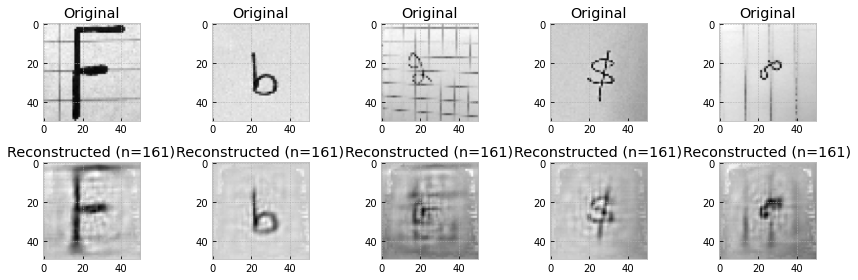

In [8]:
pca = joblib.load('pca.pkl')

image_size = 50

# Transform the test data using the selected number of PCs
X_test_reduced = pca.named_steps['pca'].transform(X_test)

# Inverse transform to the original dimensionality
X_test_reconstructed = pca.named_steps['pca'].inverse_transform(X_test_reduced)

n_examples = 5

plt.figure(figsize=(12, 4))
for i in range(n_examples):
    # Original test image
    plt.subplot(2, n_examples, i + 1)
    plt.imshow(X_test[i].reshape(image_size, image_size), cmap='gray')
    plt.title('Original')
    # Reconstructed test image
    plt.subplot(2, n_examples, n_examples + i + 1)
    plt.imshow(X_test_reconstructed[i].reshape(image_size, image_size), cmap='gray')
    plt.title(f'Reconstructed (n={161})')

plt.tight_layout()
plt.show()

Visualize the top 10 eigenvectors

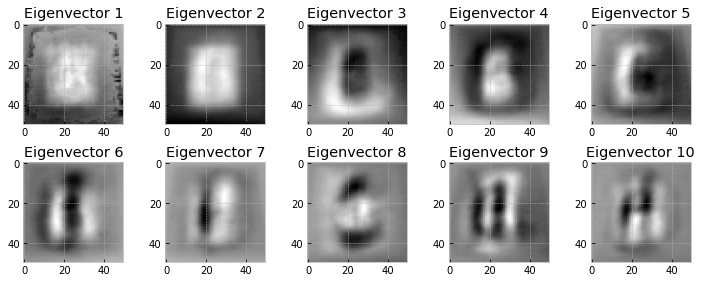

In [9]:
# Get the top 10 eigenvectors (principal components)
top_10_eigenvectors = pca.named_steps['pca'].components_[:10]

# Visualize the top 10 eigenvectors
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(top_10_eigenvectors[i].reshape(50, 50), cmap='gray')
    plt.title(f'Eigenvector {i + 1}')

plt.tight_layout()
plt.show()

Compare performances

In [50]:
lr_pca = joblib.load('lr_pca.pkl')
y_test_pca = lr_pca.predict(X_test)

# Performance
accuracy_pca_test = accuracy_score(t_test, y_test_pca)
confusion_matrix_pca = confusion_matrix(t_test, y_test_pca)
classification_report_pca = classification_report(t_test, y_test_pca, target_names=[str(i) for i in range(10)])

In [11]:
lr = joblib.load('lr.pkl')
y_test_lr = lr.predict(X_test)

# Performance
accuracy_lr = accuracy_score(t_test, y_test_lr)
confusion_matrix_lr = confusion_matrix(t_test, y_test_lr)
classification_report_lr = classification_report(t_test, y_test_lr, target_names=[str(i) for i in range(10)])

In [12]:
# Report results
print("Pipeline 1 (with PCA):")
print(f"Accuracy (Test Set): {accuracy_pca_test:.4f}")
print("Confusion Matrix:\n", confusion_matrix_pca)
print("Classification Report:\n", classification_report_pca)

print("\nPipeline 2 (without PCA):")
print(f"Accuracy (Test Set): {accuracy_lr:.4f}")
print("Confusion Matrix:\n", confusion_matrix_lr)
print("Classification Report:\n", classification_report_lr)

Pipeline 1 (with PCA):
Accuracy (Test Set): 0.3837
Confusion Matrix:
 [[119  13  31  26  15   4  19  28   9  11]
 [ 13  86  23  15  18  14  16  53  19  13]
 [ 10  17 158  24  24  10  18  16   4   6]
 [ 46  12  27 109  10  26  30  16   9  10]
 [ 19  25  66  21  91  25  18  24   5  15]
 [  8  18  36  24  25  95  26  16  40   9]
 [ 20  16  20  26  15  16 127  15  23  13]
 [ 18  31  44  17   8  11   6 122  12   9]
 [ 21  21  12  12   8  25  34  22 110  27]
 [ 15  17  16  15  23  27  29  31  25  88]]
Classification Report:
               precision    recall  f1-score   support

           0       0.41      0.43      0.42       275
           1       0.34      0.32      0.33       270
           2       0.36      0.55      0.44       287
           3       0.38      0.37      0.37       295
           4       0.38      0.29      0.33       309
           5       0.38      0.32      0.35       297
           6       0.39      0.44      0.41       291
           7       0.36      0.44      0.3

**3. Use Fisher's Linear Discriminant Analysis (LDA) and t-SNE to reduce the dataset to 2-dimensions and visualize it.**

/scratch/local/14520992/ipykernel_2661457/719832910.py:13: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(ticks=range(10))
/scratch/local/14520992/ipykernel_2661457/719832910.py:19: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(ticks=range(10))


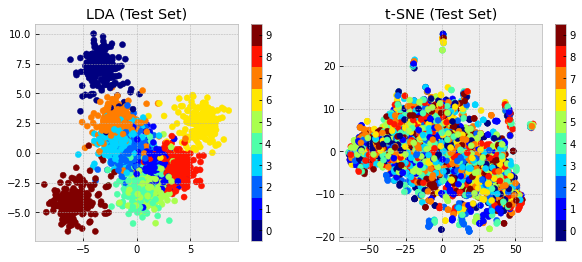

In [13]:
lda = joblib.load('lda.pkl')
tsne = joblib.load('tsne.pkl')

# Transform the test data using LDA and t-SNE pipeline
X_lda_test = lda.fit_transform(X_test, t_test)
X_tsne_test = tsne.fit_transform(X_test)

# Visualize LDA and t-SNE for the test set
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.scatter(X_lda_test[:, 0], X_lda_test[:, 1], c=t_test, cmap=plt.cm.get_cmap('jet', 10))
plt.colorbar(ticks=range(10))
plt.clim(-0.5, 9.5)
plt.title('LDA (Test Set)')

plt.subplot(1, 2, 2)
plt.scatter(X_tsne_test[:, 0], X_tsne_test[:, 1], c=t_test, cmap=plt.cm.get_cmap('jet', 10))
plt.colorbar(ticks=range(10))
plt.clim(-0.5, 9.5)
plt.title('t-SNE (Test Set)')

plt.show()

Plot Cumulative Explained Variance Ratio vs. Number of Principal Components

Number of components for 90% explained variance: 8


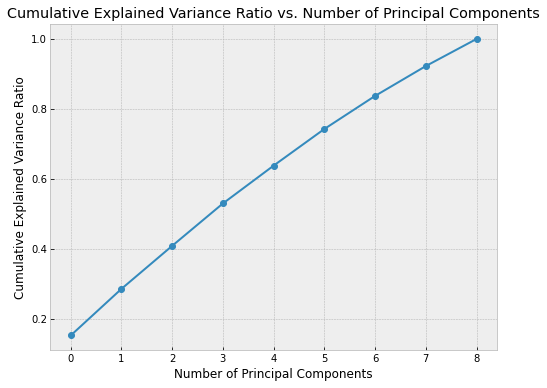

In [14]:
lda2 = joblib.load('lda2.pkl')

# Calculate the cumulative explained variance ratio
cumulative_variance = np.cumsum(lda2.named_steps['lda'].explained_variance_ratio_)

# Define the desired explained variance ratio
desired_variance_ratio = 0.9

# Find the number of components required to achieve the desired variance ratio
n_components_90_percent = np.argmax(cumulative_variance >= desired_variance_ratio) + 1
print("Number of components for 90% explained variance:", n_components_90_percent)

# Plot the cumulative explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(cumulative_variance, marker='o', linestyle='-')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio vs. Number of Principal Components')
plt.grid(True)
plt.show()

Visualize and compare the 2-dimensional projections with PCA.

/scratch/local/14520992/ipykernel_2661457/464026982.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(ticks=range(10))


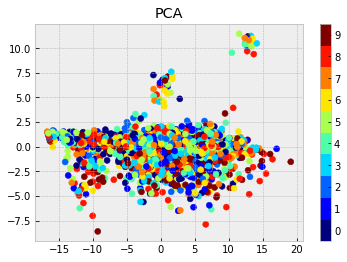

In [15]:
pca2 = joblib.load('pca2.pkl')
X_pca_test = pca2.fit_transform(X_test)

plt.scatter(X_pca_test[:, 0], X_pca_test[:, 1], c=t_test, cmap=plt.cm.get_cmap('jet', 10))
plt.colorbar(ticks=range(10))
plt.clim(-0.5, 9.5); 
plt.title('PCA');

**4. Implement at least 3 manifold learning algorithms for reducing the dimensionality of the feature space. Utilize the new lower-dimensional feature space to build a classifier.**

Load models and predict

In [16]:
mds = joblib.load('mds.pkl')
isomap = joblib.load('isomap.pkl')
lle = joblib.load('lle.pkl')

X_test_mds = mds.fit_transform(X_test)
X_test_isomap = isomap.fit_transform(X_test)
X_test_lle = lle.fit_transform(X_test)

svc_mds = joblib.load('svc_mds.pkl')
svc_isomap = joblib.load('svc_isomap.pkl')
svc_lle = joblib.load('svc_lle.pkl')

y_test_mds = svc_mds.predict(X_test_mds)
y_test_isomap = svc_isomap.predict(X_test_isomap)
y_test_lle = svc_lle.predict(X_test_lle)

/apps/python/3.10/lib/python3.10/site-packages/sklearn/manifold/_isomap.py:348: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/apps/python/3.10/lib/python3.10/site-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


Report performance

In [17]:
accuracy_mds = accuracy_score(t_test, y_test_mds)
report_mds = classification_report(t_test, y_test_mds)
print(f"Results for MDS dimensionality reduction:")
print("Accuracy:", accuracy_mds)
print("Classification Report:")
print(report_mds)

accuracy_isomap = accuracy_score(t_test, y_test_isomap)
report_isomap = classification_report(t_test, y_test_isomap)
print(f"Results for ISOMAP dimensionality reduction:")
print("Accuracy:", accuracy_isomap)
print("Classification Report:")
print(report_isomap)

accuracy_lle = accuracy_score(t_test, y_test_lle)
report_lle = classification_report(t_test, y_test_lle)
print(f"Results for LLE dimensionality reduction:")
print("Accuracy:", accuracy_lle)
print("Classification Report:")
print(report_lle)

Results for MDS dimensionality reduction:
Accuracy: 0.1125
Classification Report:
              precision    recall  f1-score   support

         0.0       0.08      0.08      0.08       275
         1.0       0.10      0.12      0.11       270
         2.0       0.15      0.23      0.18       287
         3.0       0.11      0.18      0.14       295
         4.0       0.10      0.06      0.08       309
         5.0       0.12      0.09      0.10       297
         6.0       0.10      0.04      0.06       291
         7.0       0.11      0.07      0.08       278
         8.0       0.07      0.05      0.06       292
         9.0       0.13      0.20      0.16       286

    accuracy                           0.11      2880
   macro avg       0.11      0.11      0.11      2880
weighted avg       0.11      0.11      0.10      2880

Results for ISOMAP dimensionality reduction:
Accuracy: 0.08888888888888889
Classification Report:
              precision    recall  f1-score   support

      

Visualize and interpret what the first 2 dimensions in the manifold learning algorithm you train.

/scratch/local/14520992/ipykernel_2661457/4108549257.py:6: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()
/scratch/local/14520992/ipykernel_2661457/4108549257.py:13: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()
/scratch/local/14520992/ipykernel_2661457/4108549257.py:20: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


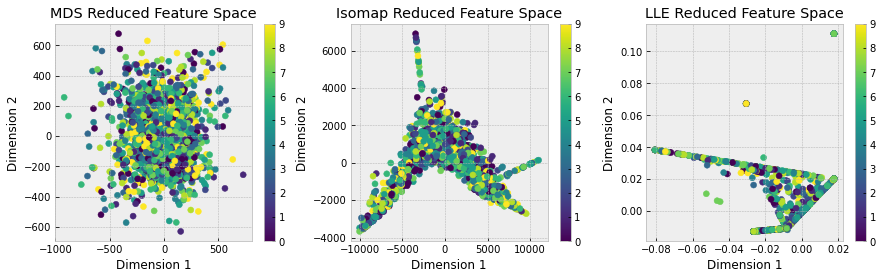

In [20]:
plt.figure(figsize=(15, 4))
# Visualize the first two dimensions for Isomap
plt.subplot(1, 3, 1)
plt.scatter(X_test_mds [:, 0], X_test_mds [:, 1], c=t_test, cmap='viridis')
plt.title("MDS Reduced Feature Space")
plt.colorbar()
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")

plt.subplot(1, 3, 2)
plt.scatter(X_test_isomap [:, 0], X_test_isomap [:, 1], c=t_test, cmap='viridis')
plt.title("Isomap Reduced Feature Space")
plt.colorbar()
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")

plt.subplot(1, 3, 3)
plt.scatter(X_test_lle [:, 0], X_test_lle [:, 1], c=t_test, cmap='viridis')
plt.title("LLE Reduced Feature Space")
plt.colorbar()
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")

plt.show()

Create function plot_components from lecture

In [21]:
def plot_components(data, model, images=None, ax=None,
                    thumb_frac=0.05, cmap='gray'):
    ax = ax or plt.gca()
    
    proj = model.fit_transform(data)
    ax.plot(proj[:, 0], proj[:, 1], '.k')
    
    if images is not None:
        min_dist_2 = (thumb_frac * max(proj.max(0) - proj.min(0))) ** 2
        shown_images = np.array([2 * proj.max(0)])
        for i in range(data.shape[0]):
            dist = np.sum((proj[i] - shown_images) ** 2, 1)
            if np.min(dist) < min_dist_2:
                # don't show points that are too close
                continue
            shown_images = np.vstack([shown_images, proj[i]])
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(images[i], cmap=cmap),
                                      proj[i])
            ax.add_artist(imagebox)

Choose 1/4 of a digit to project

In [22]:
data = X_test[::4]

MDS

Text(0.5, 1.0, 'MDS')

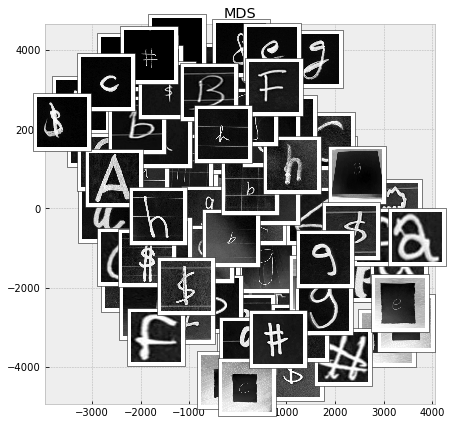

In [59]:
fig, ax = plt.subplots(figsize=(7, 7))
model1 = MDS(n_components=2, max_iter=100, n_init=1)
plot_components(data, model1, images=data.reshape((-1, 50, 50)),
                ax=ax, thumb_frac=0.05, cmap='gray_r')
plt.title('MDS')

Isomap

/apps/python/3.10/lib/python3.10/site-packages/sklearn/manifold/_isomap.py:348: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/apps/python/3.10/lib/python3.10/site-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


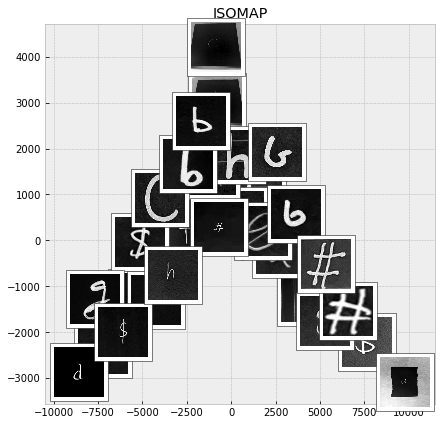

In [60]:
fig, ax = plt.subplots(figsize=(7, 7))
model2 = Isomap(n_components=2)
plot_components(data, model2, images=data.reshape((-1, 50, 50)),
                ax=ax, thumb_frac=0.05, cmap='gray_r')
plt.title('ISOMAP');

LLE

Text(0.5, 1.0, 'LLE')

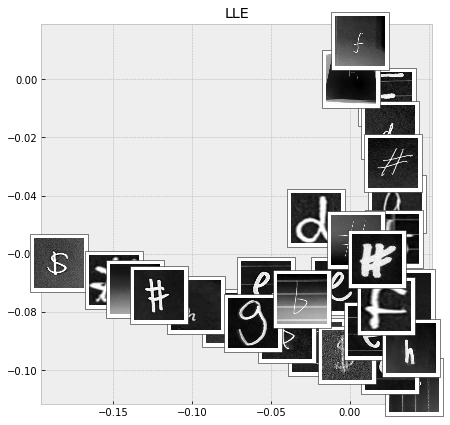

In [61]:
fig, ax = plt.subplots(figsize=(7, 7))
model3 = LocallyLinearEmbedding(n_components=2)
plot_components(data, model3, images=data.reshape((-1, 50, 50)),
                ax=ax, thumb_frac=0.05, cmap='gray_r')
plt.title('LLE')